In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns

tips = sns.load_dataset("tips")

df = tips.copy()
df.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## df hakkında bilgi edinelim 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
df_cat = df.select_dtypes("category")
df_cat

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [6]:
df_num = df.select_dtypes("float64" ,"int64")
df_num

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


## Basıt sayısal değer gösteren grafik oluşturma

In [7]:
df.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

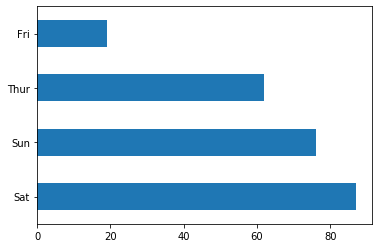

In [13]:
df.day.value_counts().plot.barh()

## Sutun grafiği 

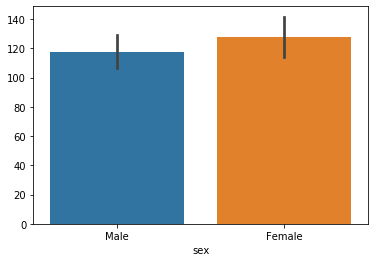

In [8]:
sns.barplot(data = df  , x = "sex" , y = df.sex.index)

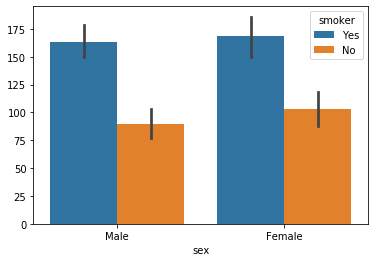

In [9]:
sns.barplot(data = df , x = "sex" ,y = df.sex.index , hue = "smoker")

In [15]:
# 3 boyutlu kategorik sutun grafiği

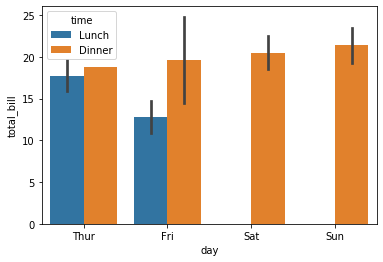

In [18]:
# günün zamansal olarak satışa olan etkisi
sns.barplot(data= df , x = "day" , y = "total_bill" ,hue = "time")

In [20]:
df.groupby(["day" ,"time"])["total_bill"].mean()

day   time  
Thur  Lunch     17.664754
      Dinner    18.780000
Fri   Lunch     12.845714
      Dinner    19.663333
Sat   Lunch           NaN
      Dinner    20.441379
Sun   Lunch           NaN
      Dinner    21.410000
Name: total_bill, dtype: float64

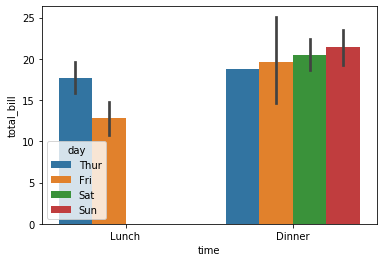

In [22]:
sns.barplot(data= df , x = "time" , y = "total_bill" ,hue = "day")

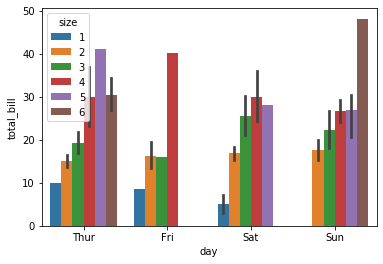

In [51]:
sns.barplot(data = df , x = "day" , y = "total_bill" , hue = "size");

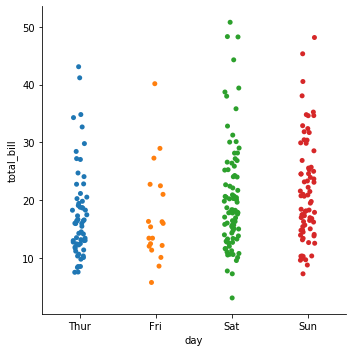

In [10]:
sns.catplot(data = df , x =  "day" , y = "total_bill")

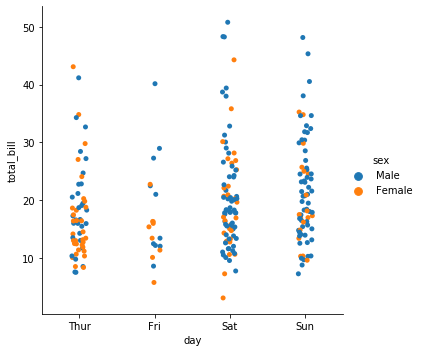

In [11]:
sns.catplot(data = df , x = "day" , y = "total_bill" , hue = "sex")

SyntaxError: invalid syntax (<ipython-input-12-69ae5e461b02>, line 1)

In [ ]:
# histogram grafigi

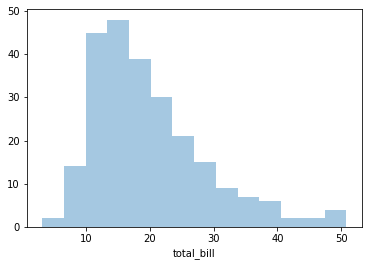

In [26]:
sns.distplot(df.total_bill , kde = False) 

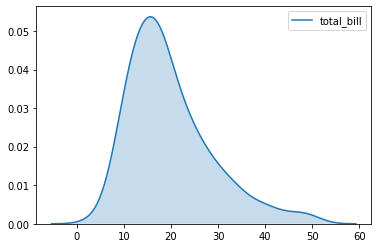

In [28]:
sns.kdeplot(df.total_bill , shade =True)

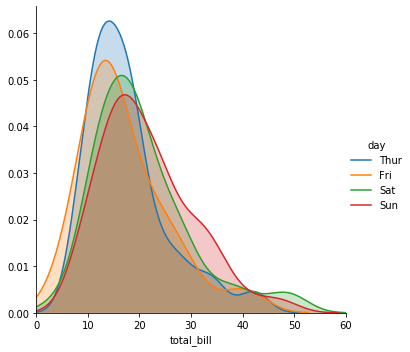

In [34]:
(sns
.FacetGrid(df , 
           hue = "day",
           height = 5 ,
           xlim = (0,60)
        )
.map(sns.kdeplot , "total_bill" , shade = True)
.add_legend()
)

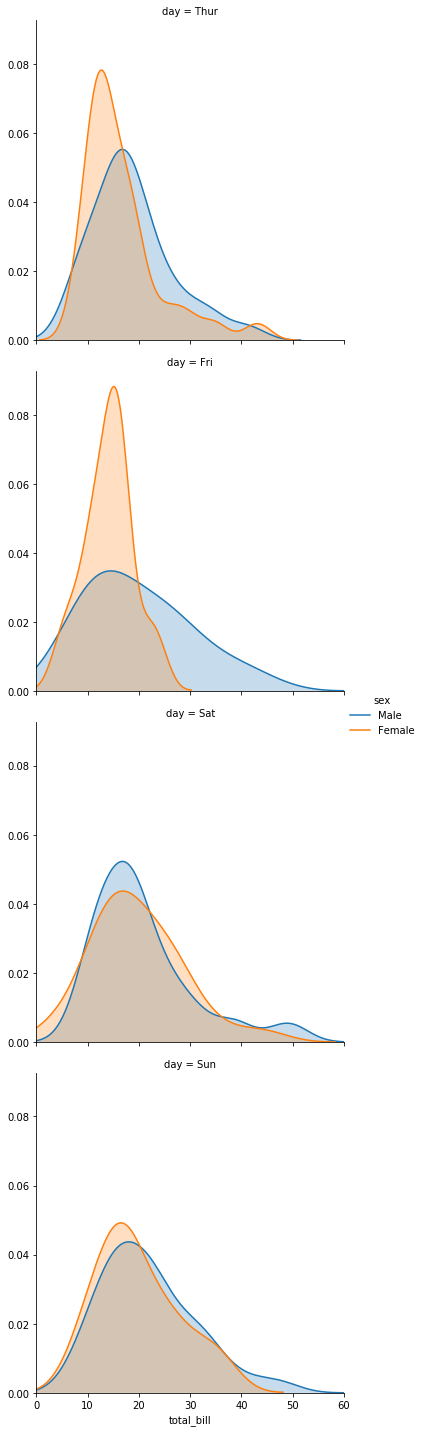

In [47]:
(sns
.FacetGrid(df,
          row = "day" ,
           hue = "sex",
          height = 5,
          xlim = (0,60) 
          )
 
 .map(sns.kdeplot , "total_bill" , shade = True)
.add_legend()
)

# cinsiyete göre günlük satış histogramları 

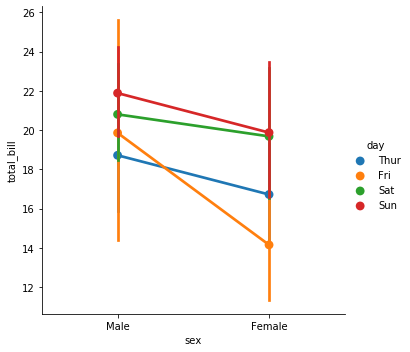

## kutu grafiği 

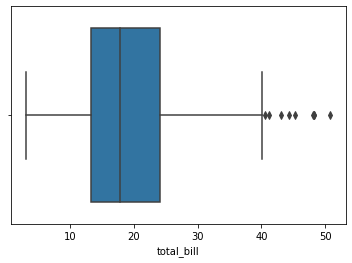

In [49]:
sns.boxplot(data = df , x = "total_bill")

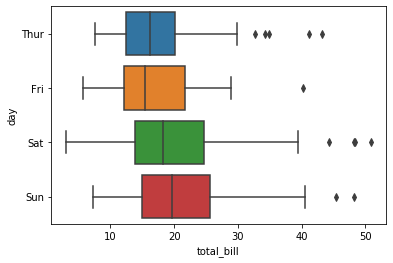

In [53]:
sns.boxplot(data = df , x = "total_bill" , y = "day");

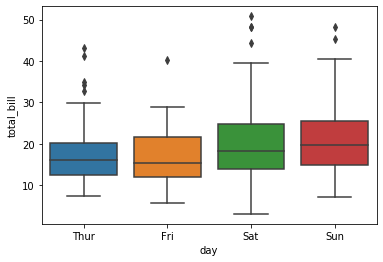

In [55]:
sns.boxplot(data = df , x = "day" , y= "total_bill");

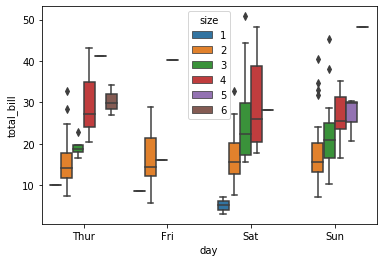

In [58]:
# günlere göre kişi sayısının gelire etkisi 
sns.boxplot(data = df , x = "day" , y = "total_bill" , hue = "size");

In [59]:
# violin grafiği 


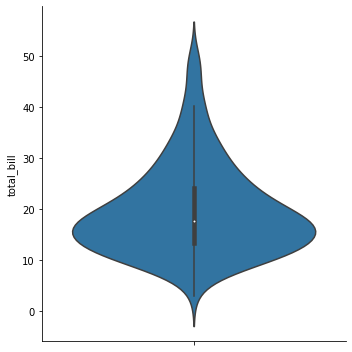

In [61]:
sns.catplot(data = df , y = "total_bill" , kind = "violin")

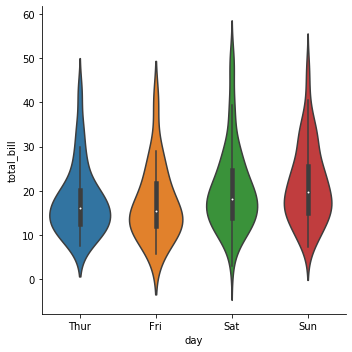

In [64]:
sns.catplot(data = df , kind = "violin" , y = "total_bill" , x = "day")

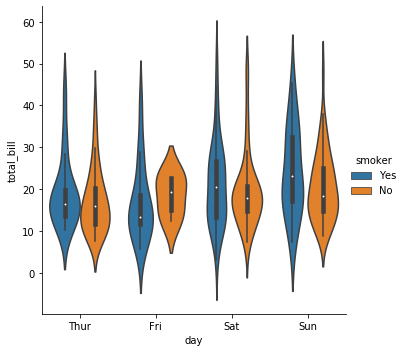

In [68]:
sns.catplot(data = df , kind = "violin" , y = "total_bill" ,x = "day" ,hue = "smoker")